In [1]:
import sys 
sys.path.append('../..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [3]:
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table['Year'] = range(1814, 2020)

AREA prev,0.55,0.4602



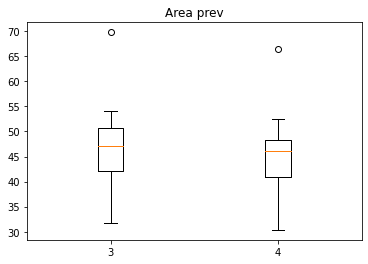

In [13]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]


kruskalwallis = mstats.kruskalwallis(list(c3['Area'].dropna()), list(c4['Area'].dropna()))
print(f"AREA prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
#print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
#plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
plt.boxplot([c3['Area'].dropna(), c4['Area'].dropna()], labels=['3', '4'])
plt.title("Area prev")
plt.show()